<a href="https://colab.research.google.com/github/ferygood/scpy/blob/main/scanpy_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scanpy numpy pandas

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

In [ ]:
# tutorial website https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html

In [3]:
!mkdir data
!wget http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz -O data/pbmc3k_filtered_gene_bc_matrices.tar.gz

--2024-01-23 18:16:42--  http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.0.173, 104.18.1.173, 2606:4700::6812:ad, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.0.173|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz [following]
--2024-01-23 18:16:42--  https://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.0.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7621991 (7.3M) [application/x-tar]
Saving to: ‘data/pbmc3k_filtered_gene_bc_matrices.tar.gz’

data/pbmc3k_filtere 100%[===================>]   7.27M  10.5MB/s    in 0.7s    

2024-01-23 18:16:43 (10.5 MB/s) - ‘data/pbmc3k_filtered_gene_bc_matric

In [4]:
!cd data; tar -xzf pbmc3k_filtered_gene_bc_matrices.tar.gz
!mkdir write

In [2]:
sc.settings.verbosity = 3 # 3 for hints
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor="white")

/home/yaochung41/python_env/scanpy/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.6 anndata==0.10.4 umap==0.5.5 numpy==1.26.3 scipy==1.12.0 pandas==2.2.0 scikit-learn==1.4.0 statsmodels==0.14.1 pynndescent==0.5.11


In [3]:
results_file = 'write/pbmc3k.h5ad' # the file that will store the analysis results

In [4]:
adata = sc.read_10x_mtx(
    "data/filtered_gene_bc_matrices/hg19/", # the dir with the `.mtx` file
    var_names='gene_symbols', # use gene symbols for the variable names (variables-axis index)
    cache=True # write a cache file for faster subsequent reading
)

... reading from cache file cache/data-filtered_gene_bc_matrices-hg19-matrix.h5ad


/home/yaochung41/python_env/scanpy/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [5]:
adata.var_names_make_unique() 

In [6]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

normalizing counts per cell


    finished (0:00:00)


/home/yaochung41/python_env/scanpy/lib/python3.9/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/yaochung41/python_env/scanpy/lib/python3.9/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/yaochung41/python_env/scanpy/lib/python3.9/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/yaochung41/python_env/scanpy/lib/python3.9/site-packages/seaborn/categorical.p

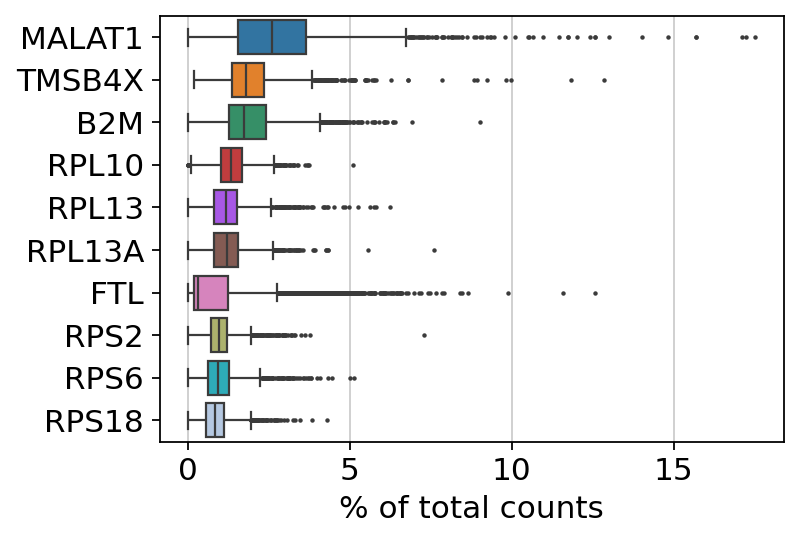

In [7]:
sc.pl.highest_expr_genes(adata, n_top=10, )

In [8]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 19024 genes that are detected in less than 3 cells


In [9]:
# do quality control, deal with mitochondrial genes
adata.var['mt'] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

/home/yaochung41/python_env/scanpy/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:840: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(
/home/yaochung41/python_env/scanpy/lib/python3.9/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/yaochung41/python_env/scanpy/lib/python3.9/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/yaochung41/python_env/scanpy/lib/python3.9/site-packages/seaborn/_base.py:949: F

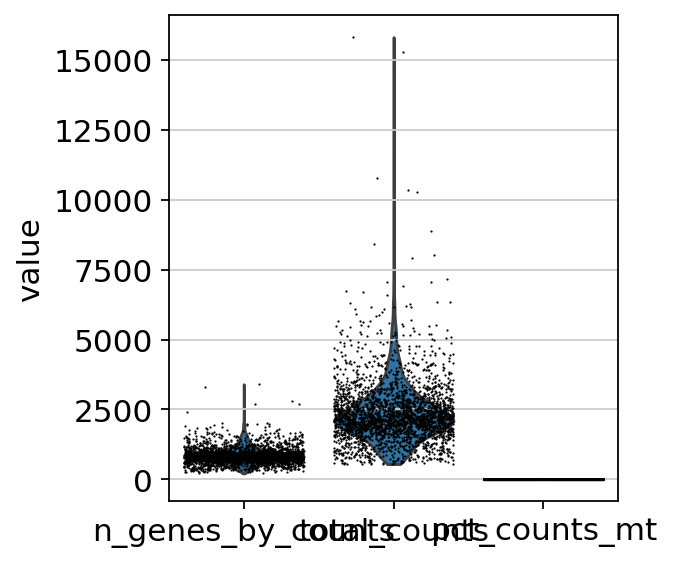

In [12]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4)
# issue using multi_panel=True

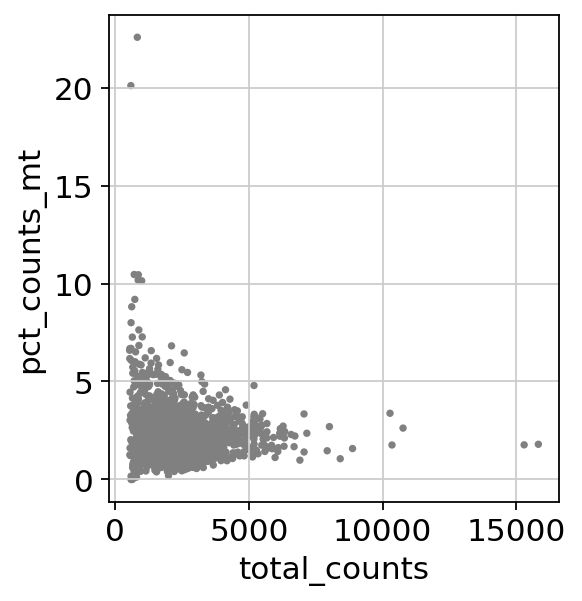

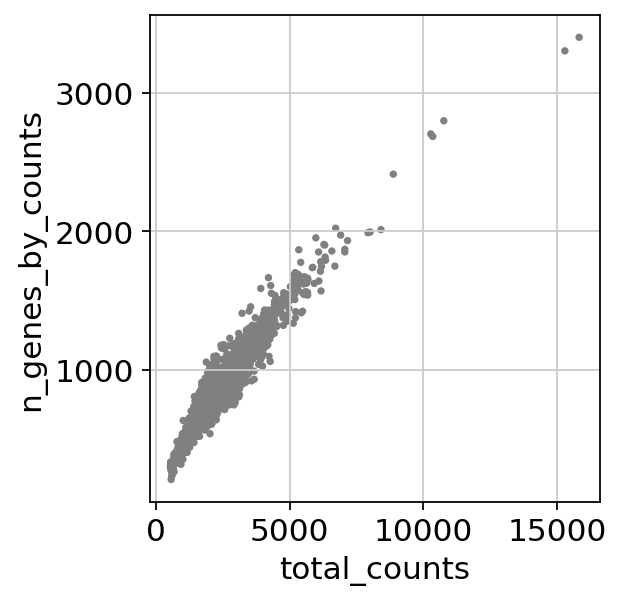

In [13]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [14]:
# slice the data to remove mitochondrial 
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [15]:
# total-count normalize (library-size correct) the data matrix X to 10,000 reads per cell, 
# so that counts become comparable among cells
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


/home/yaochung41/python_env/scanpy/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [16]:
sc.pp.log1p(adata) # logarithmize the data

In [17]:
# identify highly-variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes


/home/yaochung41/python_env/scanpy/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


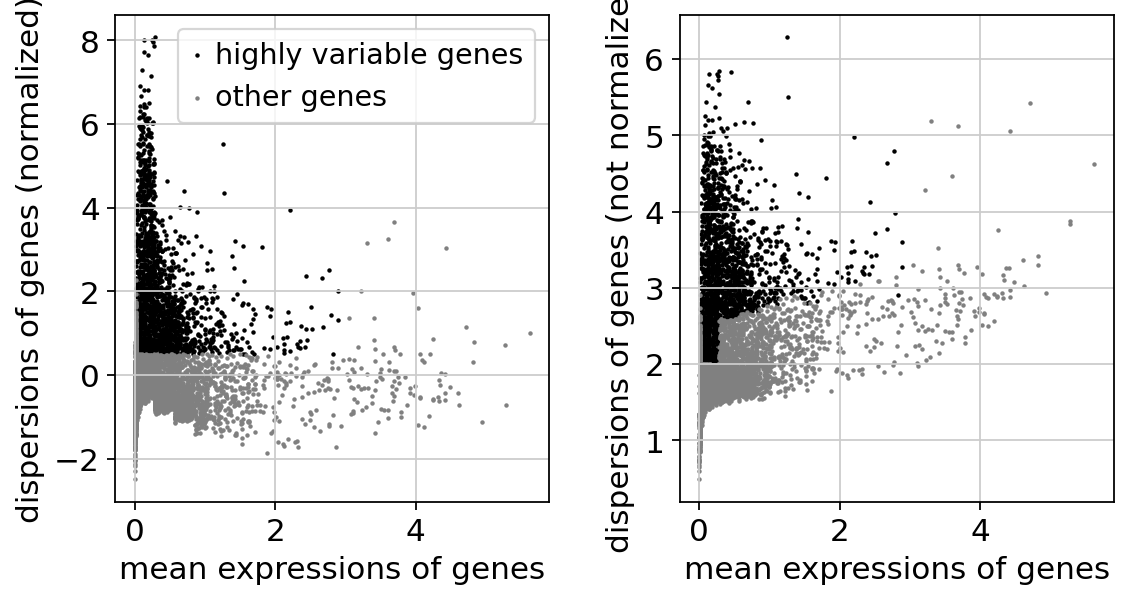

In [18]:
sc.pl.highly_variable_genes(adata)

In [21]:
# freeze the state
adata.raw = adata

In [22]:
adata = adata[:, adata.var.highly_variable]

In [23]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:04)


In [24]:
sc.pp.scale(adata, max_value=10)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


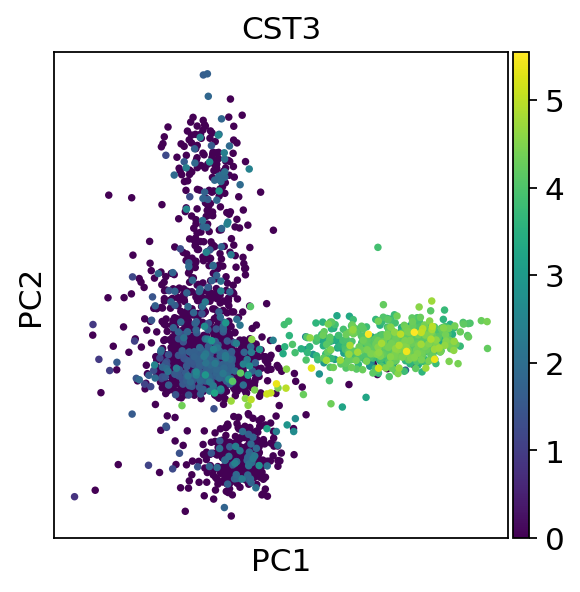

In [26]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color='CST3')

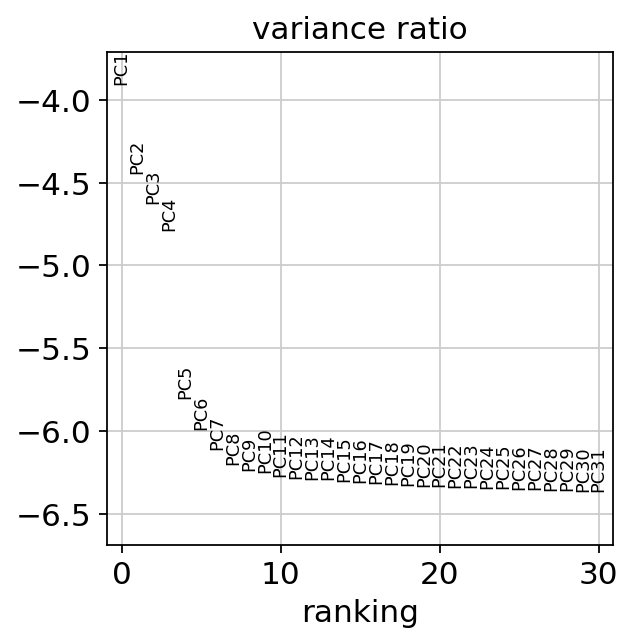

In [27]:
sc.pl.pca_variance_ratio(adata, log=True)

In [28]:
adata.write(results_file)
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [30]:
observation = adata.obs
observation

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AAACATACAACCAC-1,781,779,2419.0,73.0,3.017776
AAACATTGAGCTAC-1,1352,1352,4903.0,186.0,3.793596
AAACATTGATCAGC-1,1131,1129,3147.0,28.0,0.889736
AAACCGTGCTTCCG-1,960,960,2639.0,46.0,1.743085
AAACCGTGTATGCG-1,522,521,980.0,12.0,1.224490
...,...,...,...,...,...
TTTCGAACTCTCAT-1,1155,1153,3459.0,73.0,2.110436
TTTCTACTGAGGCA-1,1227,1224,3443.0,32.0,0.929422
TTTCTACTTCCTCG-1,622,622,1684.0,37.0,2.197150
TTTGCATGAGAGGC-1,454,452,1022.0,21.0,2.054795


In [31]:
variable = adata.var
variable

,gene_ids,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm,mean,std
TNFRSF4,ENSG00000186827,155,False,155,0.077407,94.259259,209.0,True,0.277410,2.086050,0.665406,-3.764522e-10,0.424481
CPSF3L,ENSG00000127054,202,False,202,0.094815,92.518519,256.0,True,0.385194,4.506987,2.955005,-3.135005e-10,0.460416
ATAD3C,ENSG00000215915,9,False,9,0.009259,99.666667,25.0,True,0.038252,3.953486,4.352607,5.825179e-12,0.119465
C1orf86,ENSG00000162585,501,False,501,0.227778,81.444444,615.0,True,0.678283,2.713522,0.543183,3.841088e-10,0.685145
RER1,ENSG00000157916,608,False,608,0.298148,77.481481,805.0,True,0.814813,3.447533,1.582528,8.755421e-11,0.736050
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ICOSLG,ENSG00000160223,34,False,34,0.016667,98.740741,45.0,True,0.082016,2.585818,1.652185,6.580908e-12,0.217672
SUMO3,ENSG00000184900,570,False,570,0.292963,78.888889,791.0,True,0.804815,4.046776,2.431045,-4.208251e-10,0.723121
SLC19A1,ENSG00000173638,31,False,31,0.018519,98.851852,50.0,True,0.058960,3.234231,2.932458,-2.126081e-10,0.173017
S100B,ENSG00000160307,94,False,94,0.076667,96.518519,207.0,True,0.286282,3.042992,1.078783,5.952274e-10,0.399946


In [32]:
unstructured_annotations = adata.uns
unstructured_annotations

OrderedDict([('log1p', {'base': None}),
             ('hvg', {'flavor': 'seurat'}),
             ('pca',
              {'params': {'zero_center': True, 'use_highly_variable': True},
               'variance': array([32.110466 , 18.718643 , 15.60733  , 13.235289 ,  4.8022656,
                       3.985928 ,  3.526238 ,  3.233444 ,  3.1212237,  3.07526  ,
                       2.998077 ,  2.9595244,  2.9517853,  2.9442527,  2.9138706,
                       2.8990307,  2.8806767,  2.8646827,  2.843064 ,  2.8357458,
                       2.8314178,  2.8182378,  2.803547 ,  2.7999887,  2.7889526,
                       2.778103 ,  2.7705755,  2.7602227,  2.7538579,  2.7459557,
                       2.7371824,  2.7341244,  2.722202 ,  2.7123117,  2.702475 ,
                       2.700047 ,  2.683852 ,  2.6790497,  2.6769059,  2.6739926,
                       2.6648545,  2.6573112,  2.6511757,  2.6417723,  2.6329708,
                       2.6295173,  2.6245294,  2.6183784,  2.6180015

In [33]:
observed_matrices = adata.obsm
observed_matrices

AxisArrays with keys: X_pca

In [34]:
variable_matrices = adata.varm
variable_matrices

AxisArrays with keys: PCs

In [35]:
pca_matrix = adata.obsm['X_pca']
pca_matrix

array([[-5.5562243 , -0.25772497,  0.18679808, ..., -0.3380135 ,
         1.4827744 ,  1.8977118 ],
       [-7.209526  , -7.481987  , -0.16271117, ..., -1.9792434 ,
        -1.5561666 , -1.4957627 ],
       [-2.6944404 ,  1.5836585 ,  0.6631187 , ...,  0.54241717,
        -0.5455125 , -4.339742  ],
       ...,
       [-0.7853934 , -6.718584  , -1.5988429 , ..., -0.5613978 ,
        -0.10487968,  0.5839601 ],
       [ 0.28127557, -5.9218483 , -1.1628865 , ..., -1.3778914 ,
         3.5813127 ,  1.2984595 ],
       [-0.090766  , -0.6635077 , -0.1348549 , ...,  0.37421194,
         0.7494836 , -0.666392  ]], dtype=float32)

In [36]:
n_genes_column = adata.obs['n_genes']
n_genes_column

AAACATACAACCAC-1     781
AAACATTGAGCTAC-1    1352
AAACATTGATCAGC-1    1131
AAACCGTGCTTCCG-1     960
AAACCGTGTATGCG-1     522
                    ... 
TTTCGAACTCTCAT-1    1155
TTTCTACTGAGGCA-1    1227
TTTCTACTTCCTCG-1     622
TTTGCATGAGAGGC-1     454
TTTGCATGCCTCAC-1     724
Name: n_genes, Length: 2638, dtype: int64

In [37]:
# computing the neightborhood graph
# can accept default value
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40


/home/yaochung41/python_env/scanpy/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)


computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


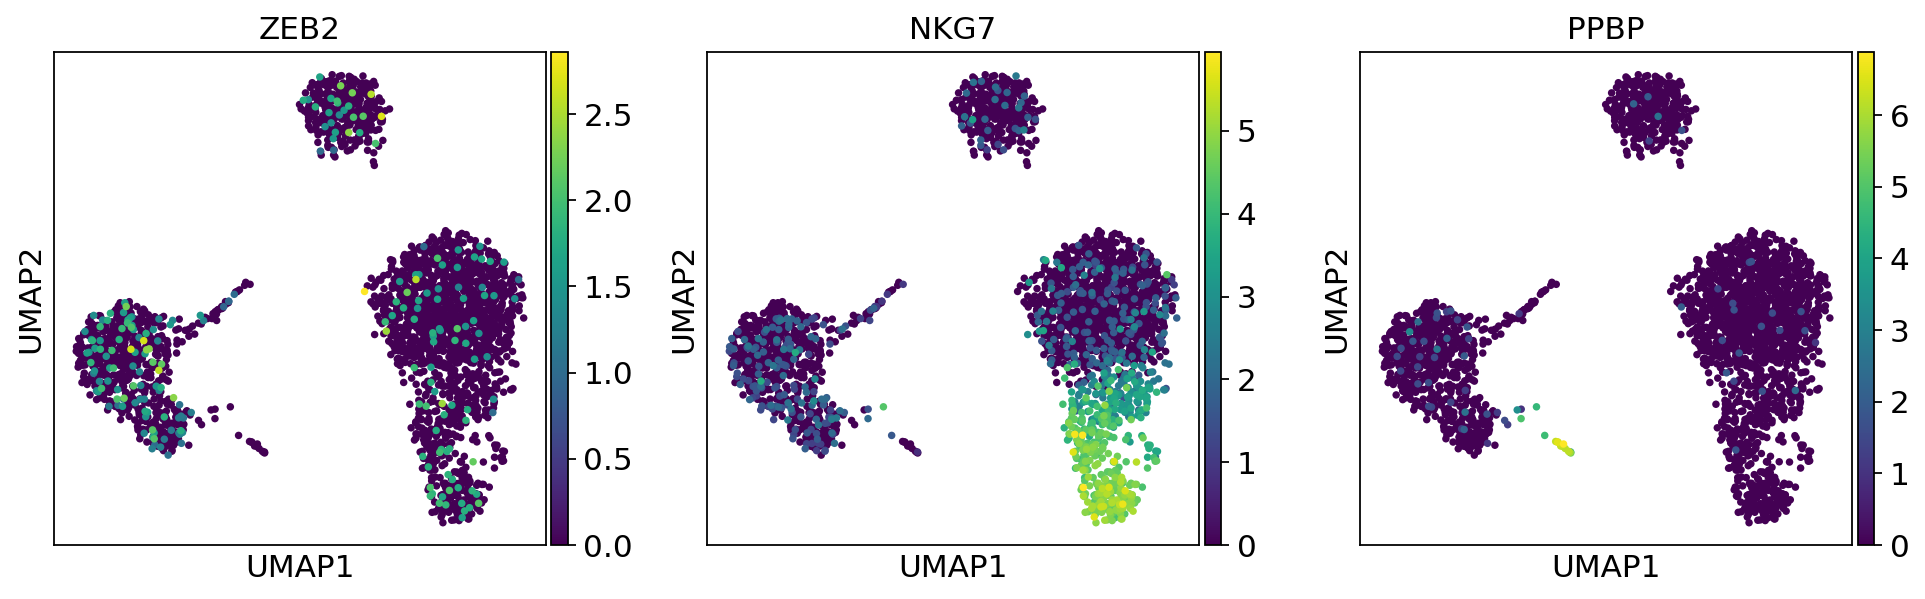

In [40]:
# umap
sc.tl.umap(adata)
sc.pl.umap(adata, color=['ZEB2', "NKG7", "PPBP"])

running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


/home/yaochung41/python_env/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/yaochung41/python_env/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


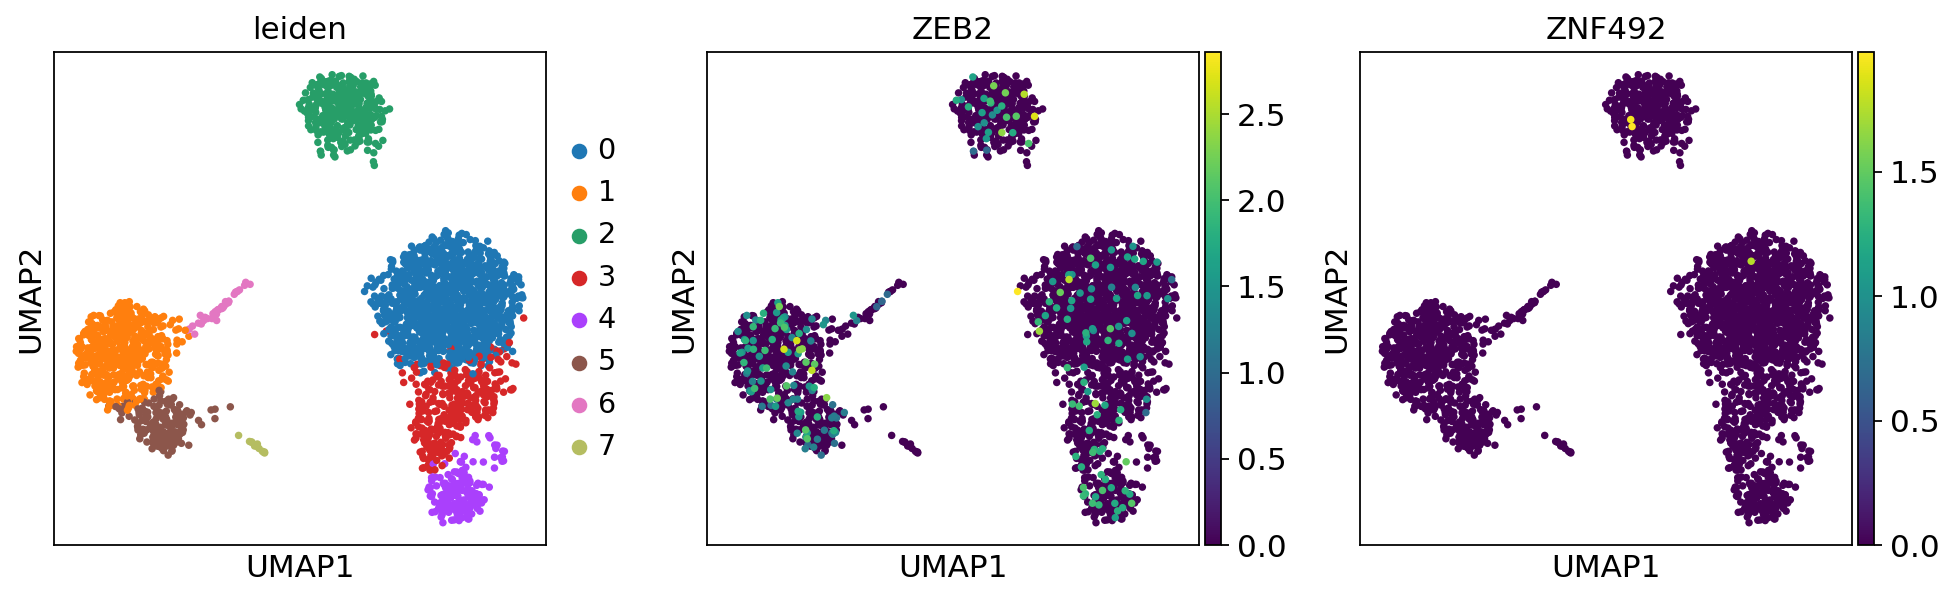

In [42]:
# leiden graph-clustering (community detection based on optimizing modularity)
sc.tl.leiden(adata)
sc.pl.umap(adata, color=['leiden', 'ZEB2', "ZNF492"])

In [43]:
# save the result
adata.write(results_file)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


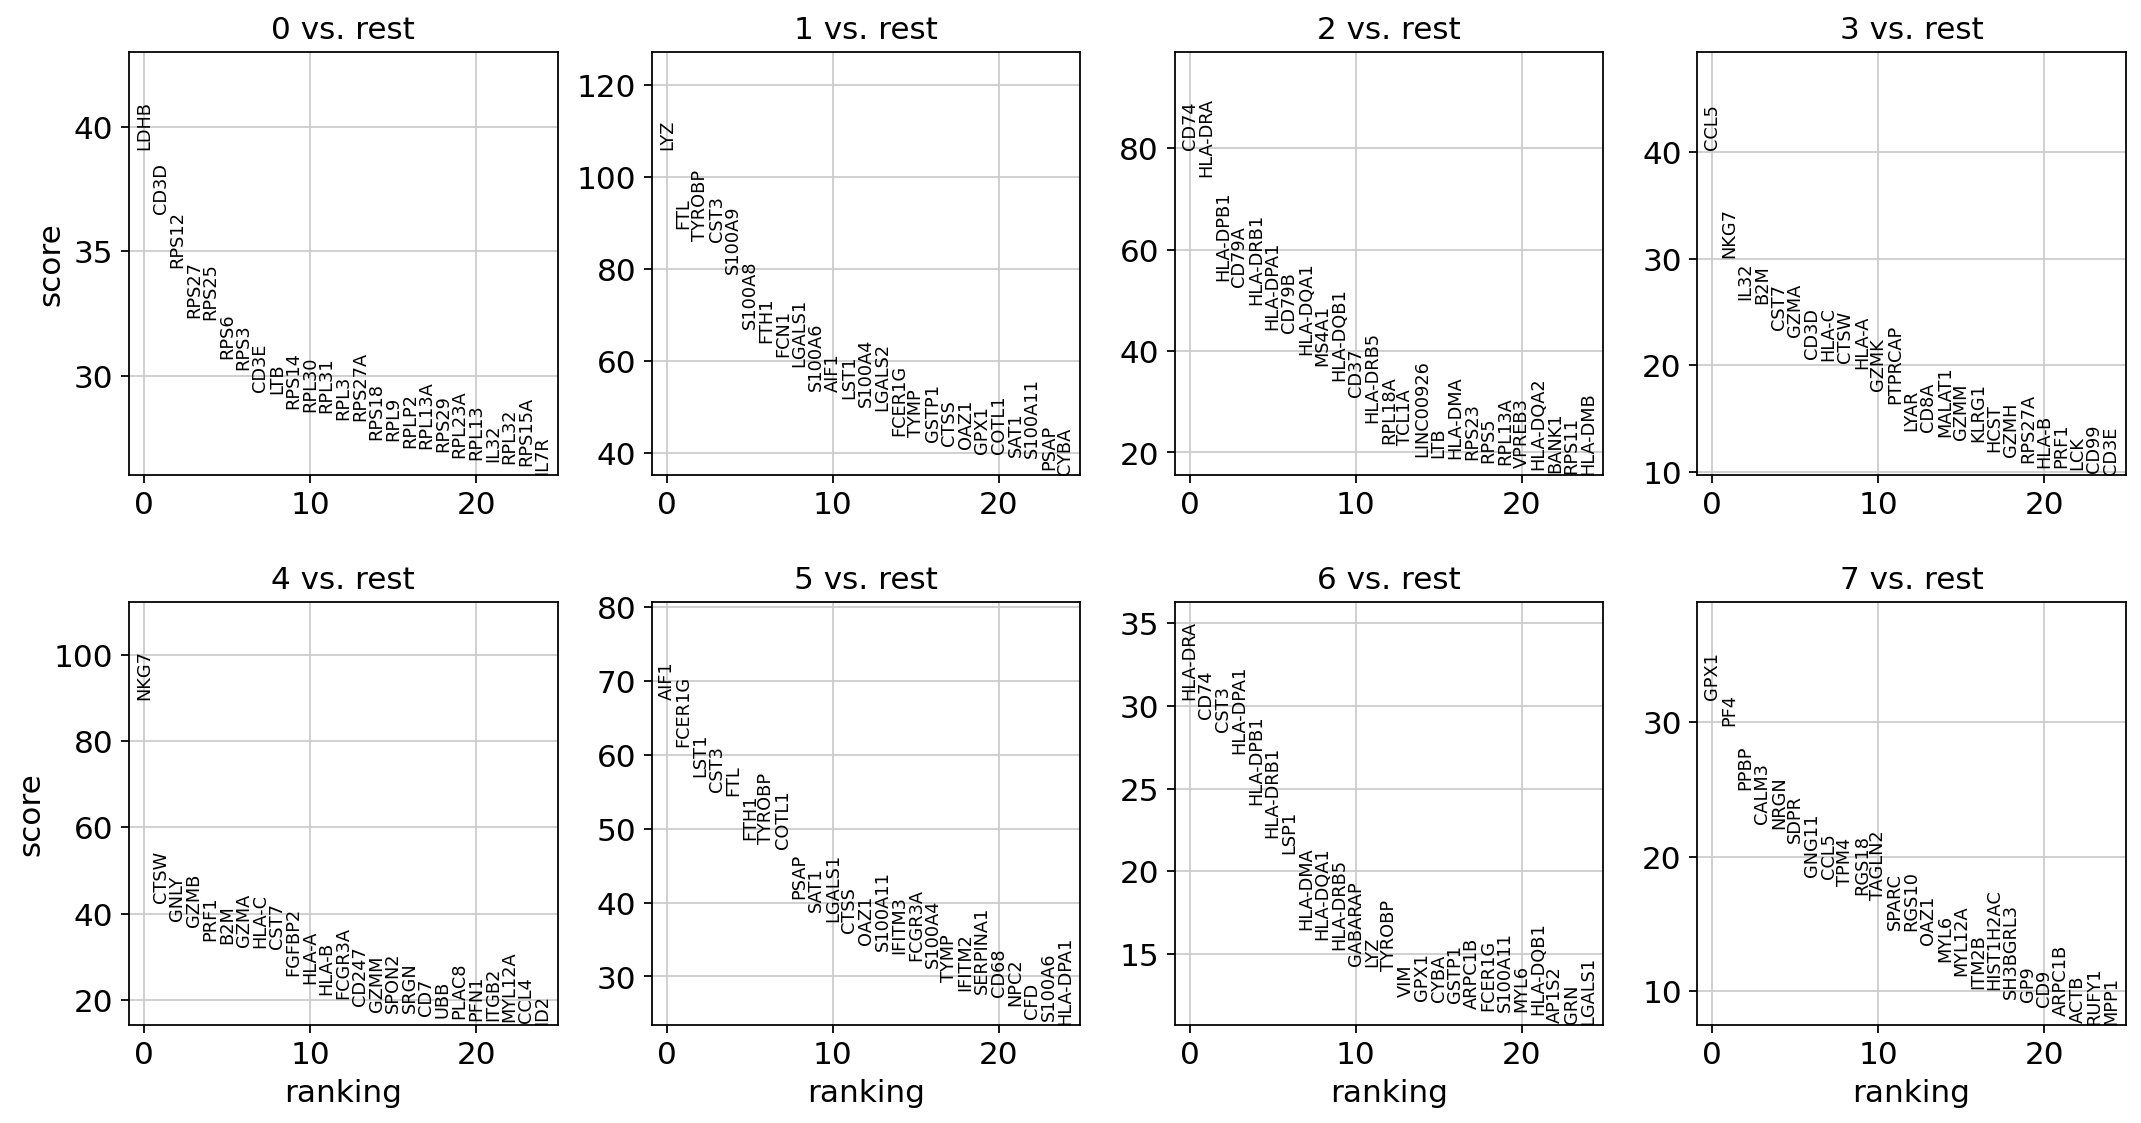

In [44]:
# Finding marker genes
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

ranking genes


/home/yaochung41/python_env/scanpy/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


    finished (0:00:01)


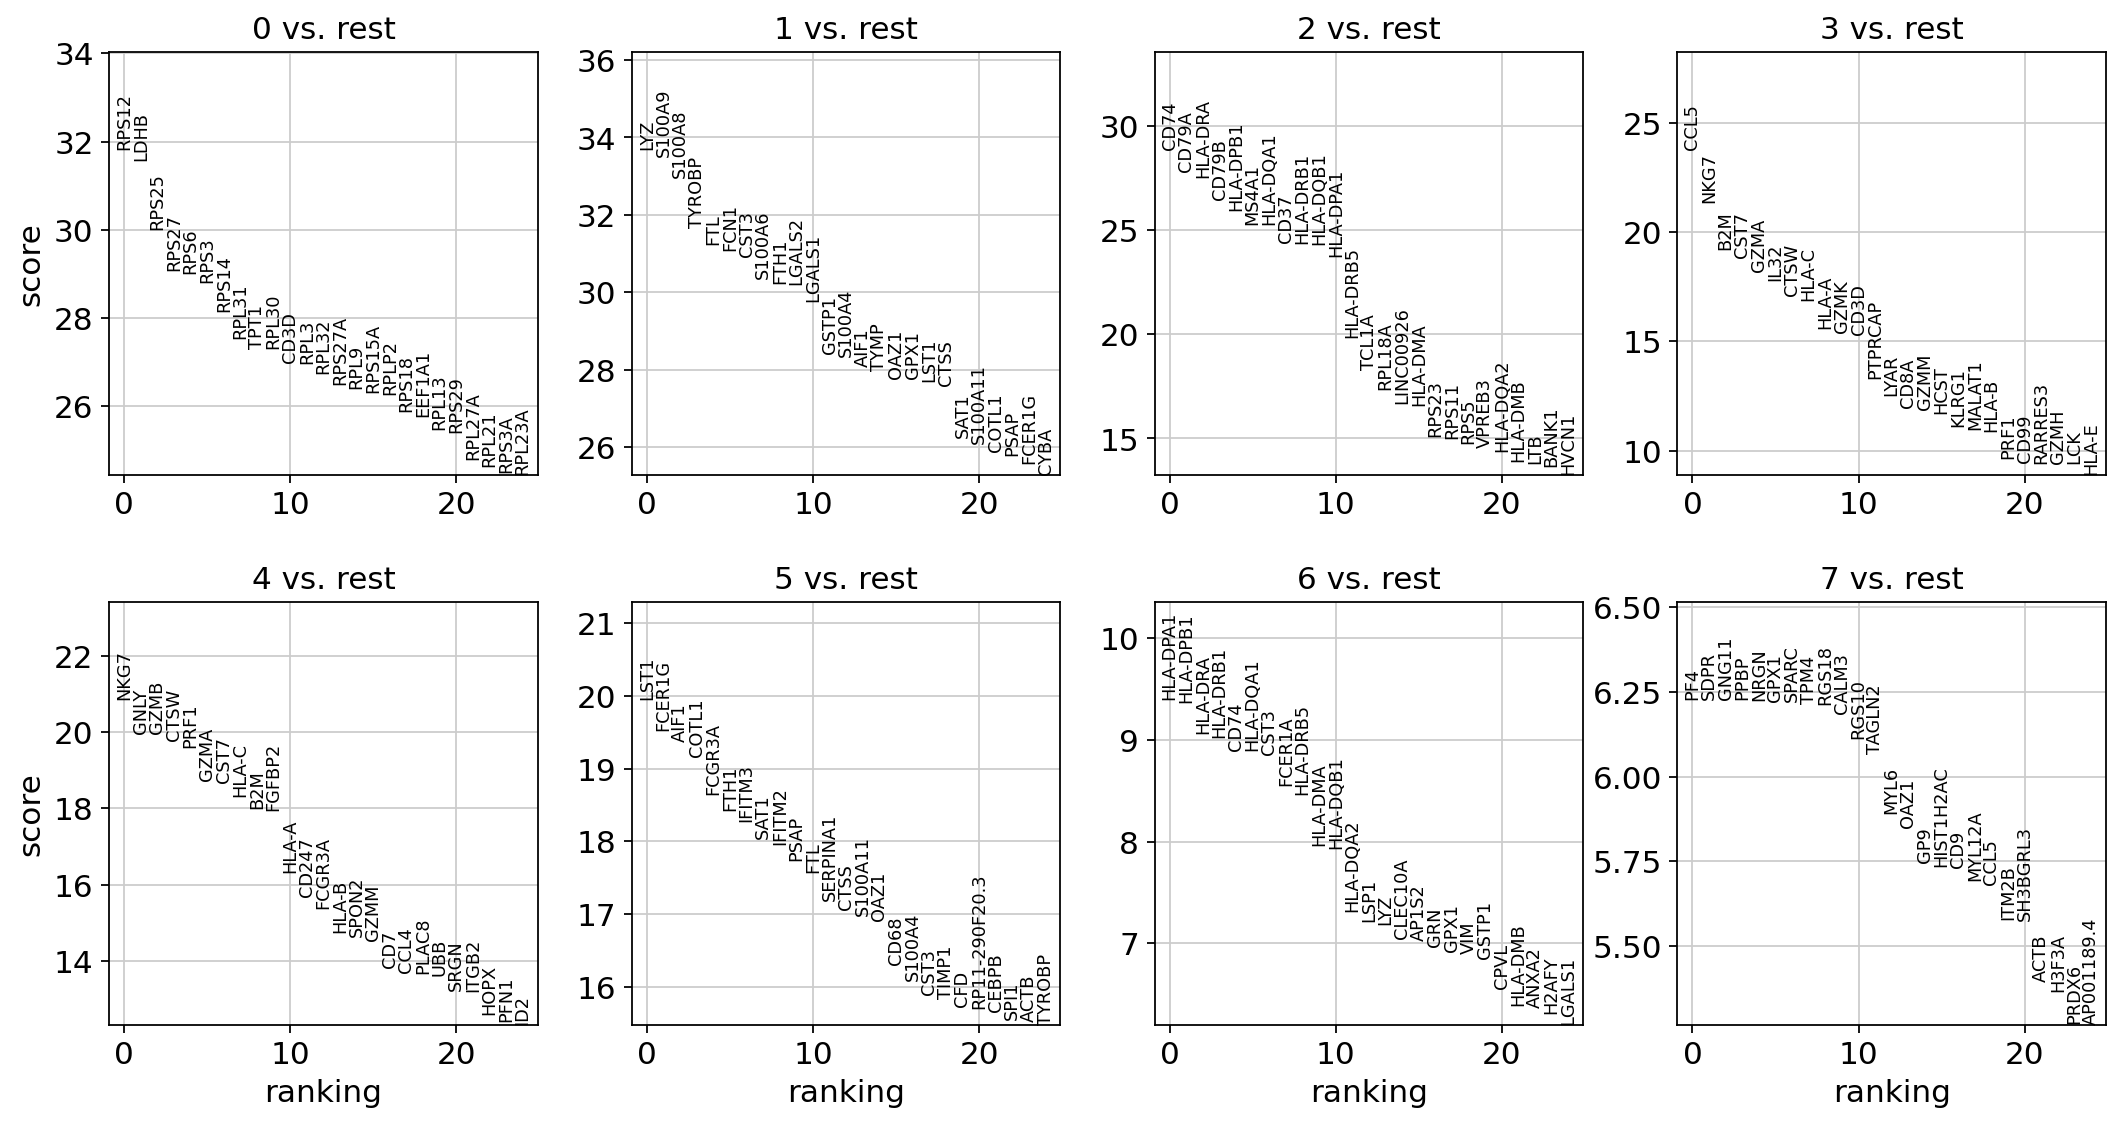

In [45]:
sc.settings.verbosity = 2 # reduce verbosity

sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)



In [46]:
adata.write(results_file)

ranking genes
    finished (0:00:04)


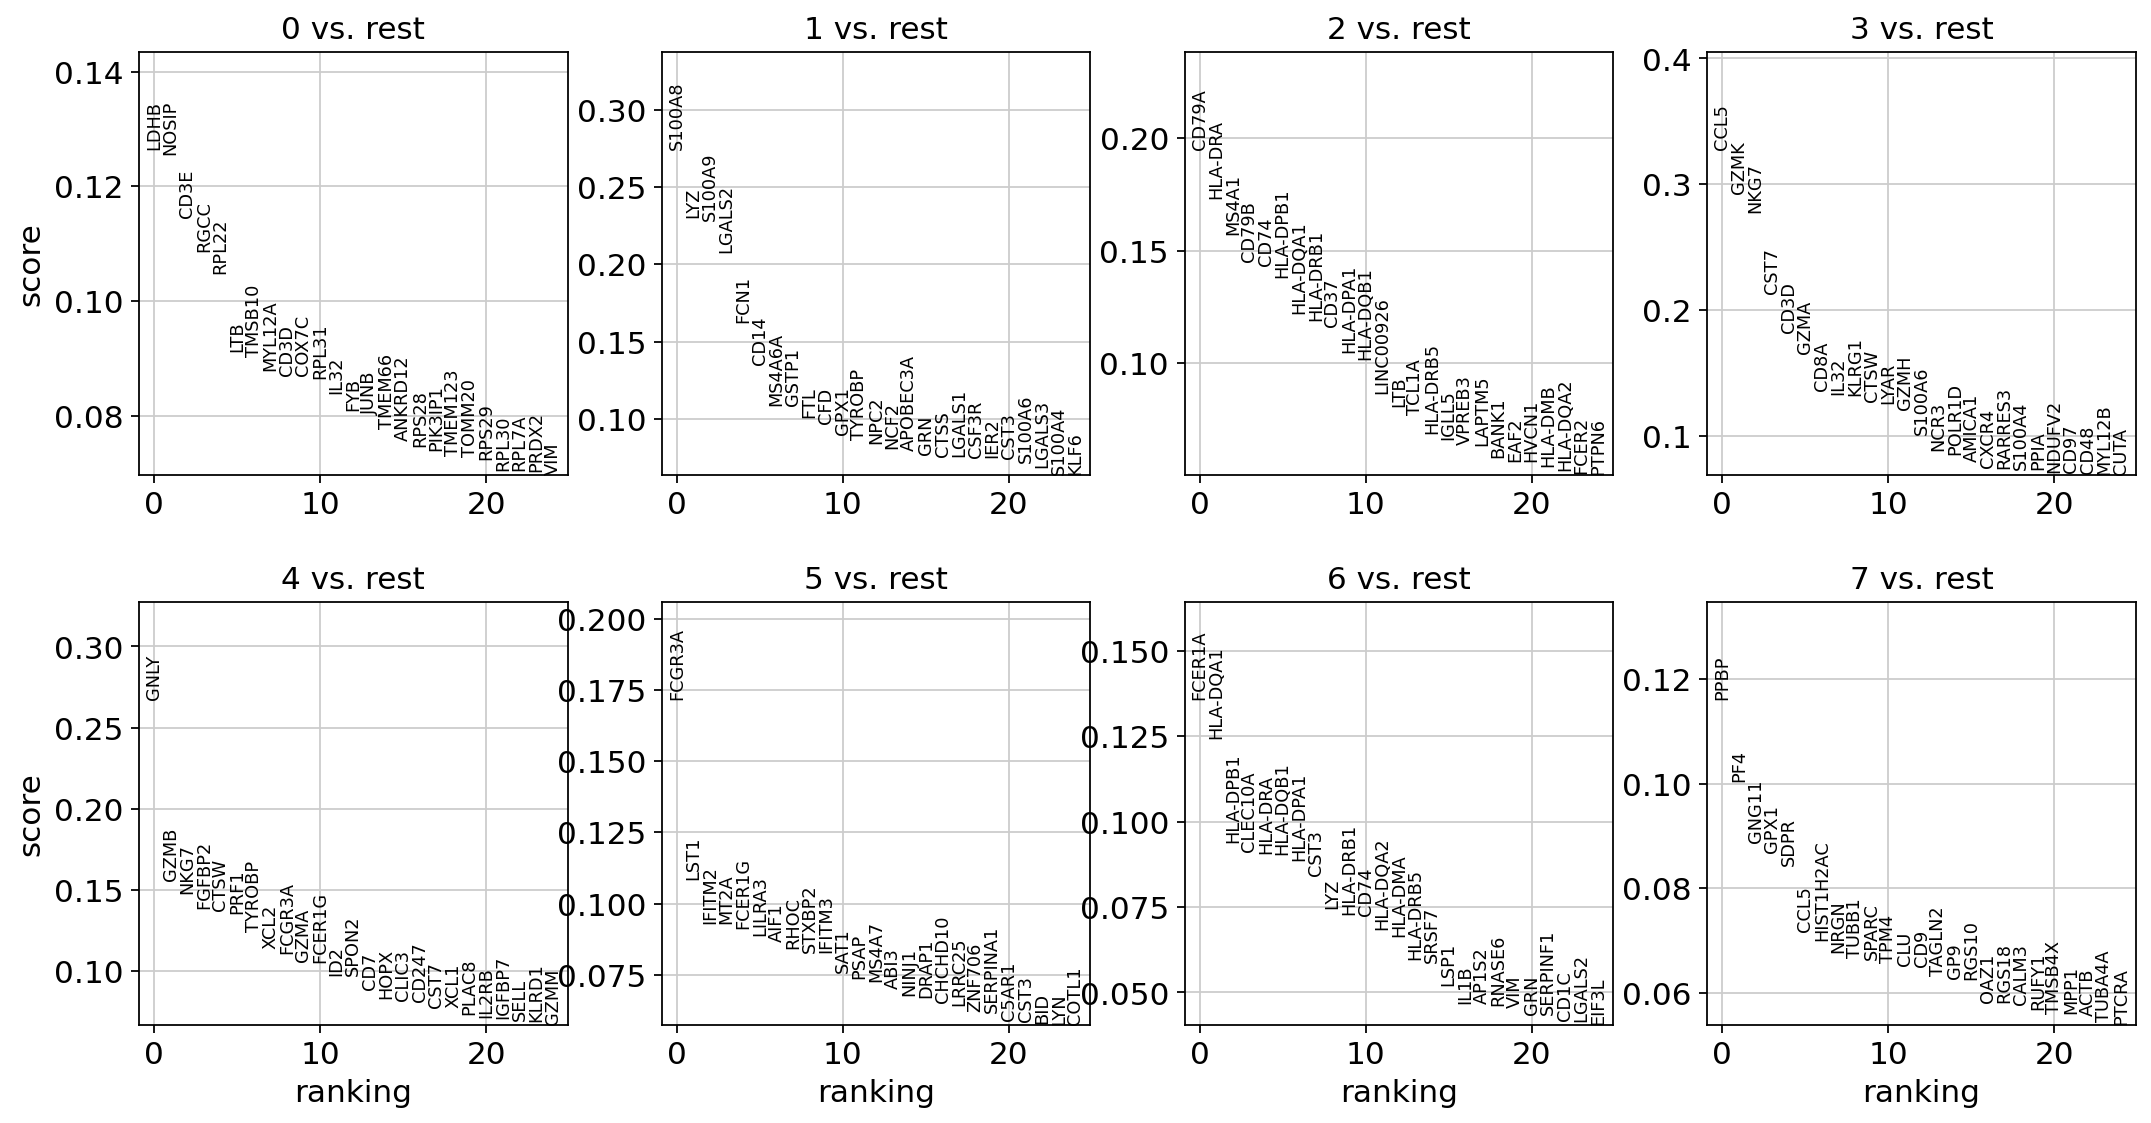

In [47]:
sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)


In [48]:
# show the 10 top ranked genes per cluster
adata = sc.read(results_file)
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)


/home/yaochung41/python_env/scanpy/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


,0,1,2,3,4,5,6,7
0,RPS12,LYZ,CD74,CCL5,NKG7,LST1,HLA-DPA1,PF4
1,LDHB,S100A9,CD79A,NKG7,GNLY,FCER1G,HLA-DPB1,SDPR
2,RPS25,S100A8,HLA-DRA,B2M,GZMB,AIF1,HLA-DRA,GNG11
3,RPS27,TYROBP,CD79B,CST7,CTSW,COTL1,HLA-DRB1,PPBP
4,RPS6,FTL,HLA-DPB1,GZMA,PRF1,FCGR3A,CD74,NRGN


In [49]:
# get a table with scores and groups
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5)

,0_n,0_p,1_n,1_p,2_n,2_p,3_n,3_p,4_n,4_p,5_n,5_p,6_n,6_p,7_n,7_p
0,RPS12,3.124720e-222,LYZ,7.634876e-249,CD74,2.487145e-183,CCL5,6.416305e-125,NKG7,1.203971e-96,LST1,1.322111e-88,HLA-DPA1,5.422417e-21,PF4,4.722886e-10
1,LDHB,7.409634e-219,S100A9,4.626358e-246,CD79A,1.679730e-170,NKG7,4.603183e-101,GNLY,1.257170e-88,FCER1G,6.259712e-85,HLA-DPB1,7.591860e-21,SDPR,4.733899e-10
2,RPS25,6.230469e-198,S100A8,1.622835e-238,HLA-DRA,6.942399e-167,B2M,4.649237e-82,GZMB,1.429027e-88,AIF1,1.348814e-83,HLA-DRA,1.306768e-19,GNG11,4.733899e-10
3,RPS27,9.002391e-186,TYROBP,2.957652e-220,CD79B,2.569135e-154,CST7,6.196308e-79,CTSW,4.144726e-87,COTL1,5.974694e-82,HLA-DRB1,1.865104e-19,PPBP,4.744938e-10
4,RPS6,5.521180e-185,FTL,2.479195e-214,HLA-DPB1,3.580735e-148,GZMA,4.822612e-74,PRF1,1.692100e-85,FCGR3A,1.392377e-77,CD74,5.853161e-19,NRGN,4.800511e-10


/home/yaochung41/python_env/scanpy/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:840: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/home/yaochung41/python_env/scanpy/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:840: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(
/home/yaochung41/python_env/scanpy/lib/python3.9/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/yaochung41/python_env/scanpy/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:840: FutureWarning: 



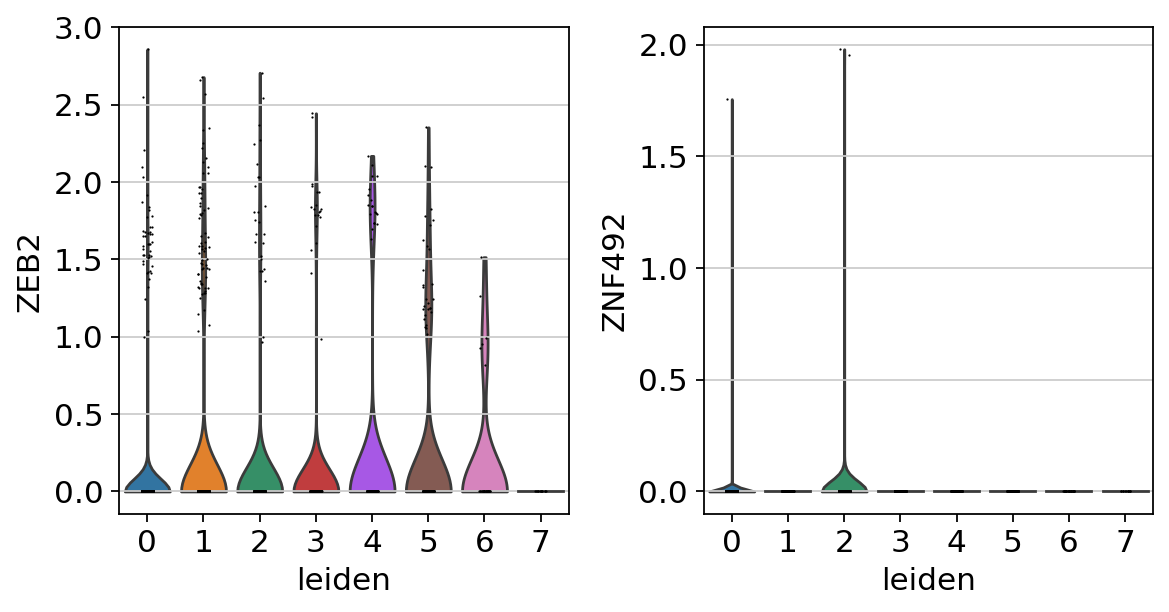

In [51]:
sc.pl.violin(adata, ['ZEB2', 'ZNF492'], groupby='leiden')

/home/yaochung41/python_env/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/yaochung41/python_env/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


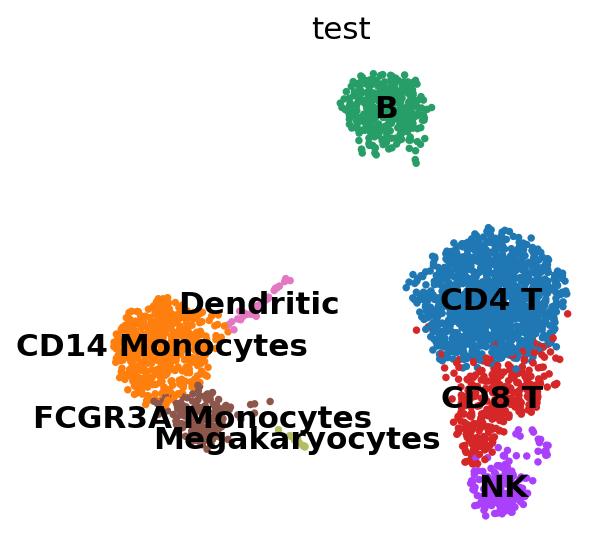

In [52]:
new_cluster_names = [
    'CD4 T', 'CD14 Monocytes',
    'B', 'CD8 T',
    'NK', 'FCGR3A Monocytes',
    'Dendritic', 'Megakaryocytes']
adata.rename_categories('leiden', new_cluster_names)

sc.pl.umap(adata, color='leiden', legend_loc='on data', title='test', frameon=False, save='.pdf')

/home/yaochung41/python_env/scanpy/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/yaochung41/python_env/scanpy/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/yaochung41/python_env/scanpy/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

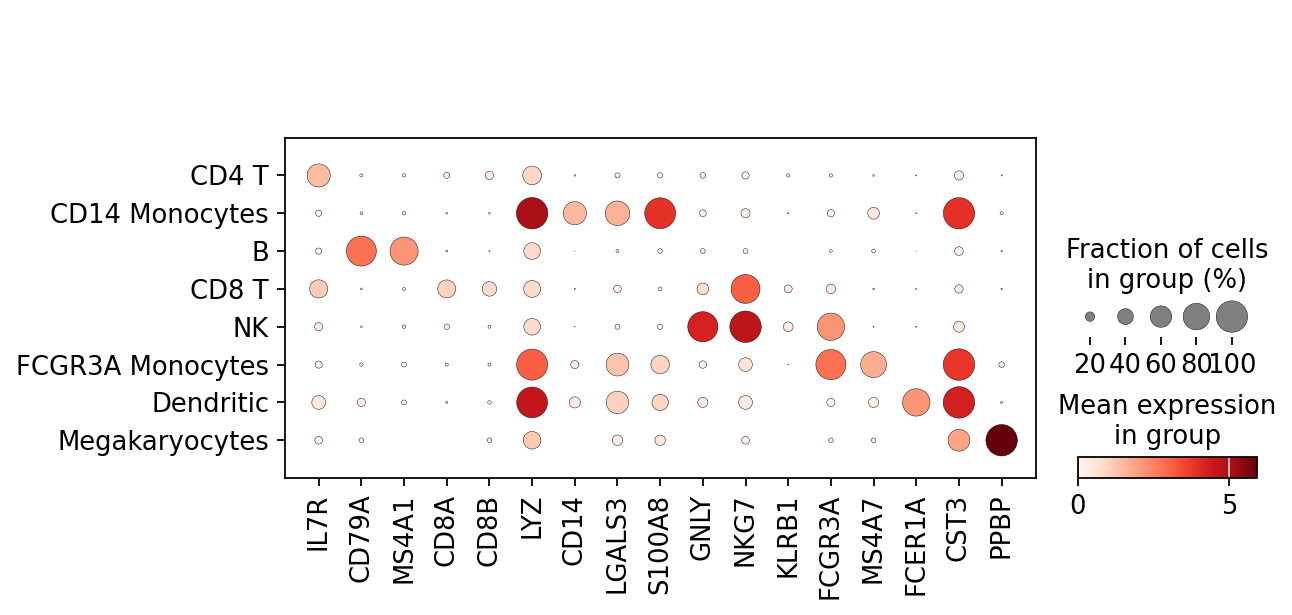

In [53]:
marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP']

sc.pl.dotplot(adata, marker_genes, groupby='leiden')

/home/yaochung41/python_env/scanpy/lib/python3.9/site-packages/scanpy/plotting/_stacked_violin.py:324: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  _color_df = _matrix.groupby(level=0).median()
/home/yaochung41/python_env/scanpy/lib/python3.9/site-packages/scanpy/plotting/_stacked_violin.py:405: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  pd.DataFrame(_matrix.stack(dropna=False))
/home/yaochung41/python_env/scanpy/lib/python3.9/site-packages/scanpy/plotting/_stacked_violin.py:461: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. As

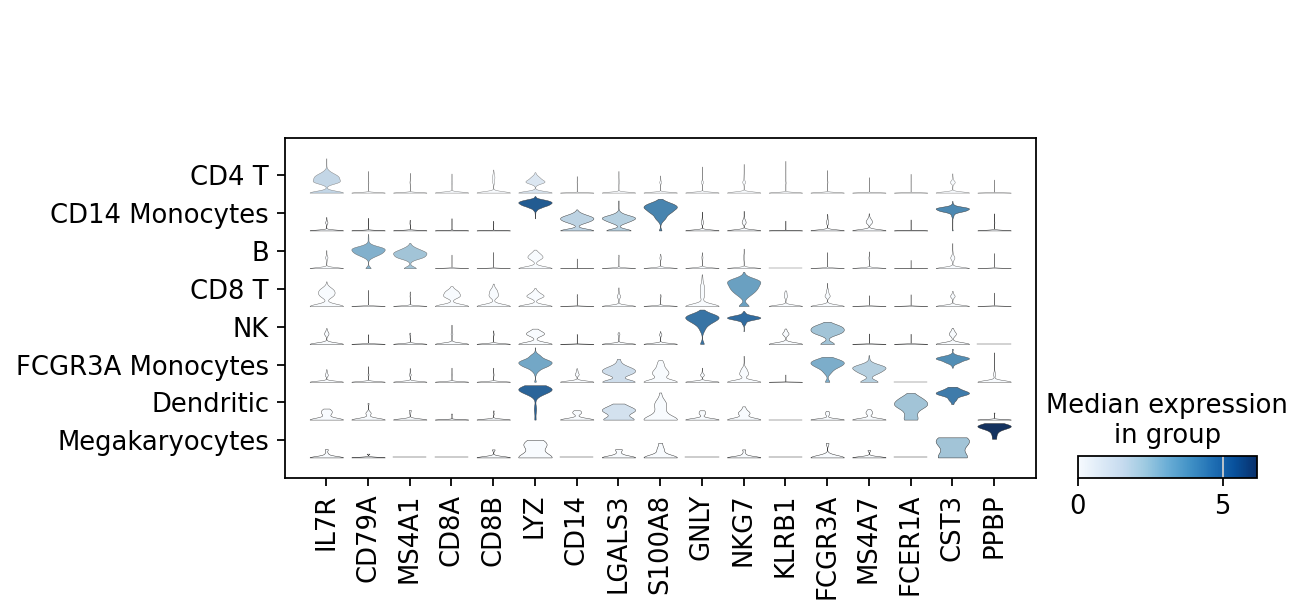

In [55]:
sc.pl.stacked_violin(adata, marker_genes, groupby='leiden')
# no rotation anymore

In [56]:
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [57]:
adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden
AAACATACAACCAC-1,781,779,2419.0,73.0,3.017776,CD8 T
AAACATTGAGCTAC-1,1352,1352,4903.0,186.0,3.793596,B
AAACATTGATCAGC-1,1131,1129,3147.0,28.0,0.889736,CD4 T
AAACCGTGCTTCCG-1,960,960,2639.0,46.0,1.743085,FCGR3A Monocytes
AAACCGTGTATGCG-1,522,521,980.0,12.0,1.224490,NK
...,...,...,...,...,...,...
TTTCGAACTCTCAT-1,1155,1153,3459.0,73.0,2.110436,CD14 Monocytes
TTTCTACTGAGGCA-1,1227,1224,3443.0,32.0,0.929422,B
TTTCTACTTCCTCG-1,622,622,1684.0,37.0,2.197150,B
TTTGCATGAGAGGC-1,454,452,1022.0,21.0,2.054795,B


In [62]:
toy_anndata = sc.datasets.pbmc68k_reduced
toy_anndata.

AttributeError: 'function' object has no attribute 'obs'